In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Read Data training dataset

In [2]:
training = pd.read_csv('training_data.csv')

### Feature seleccion with the most correlated features with dependent variable

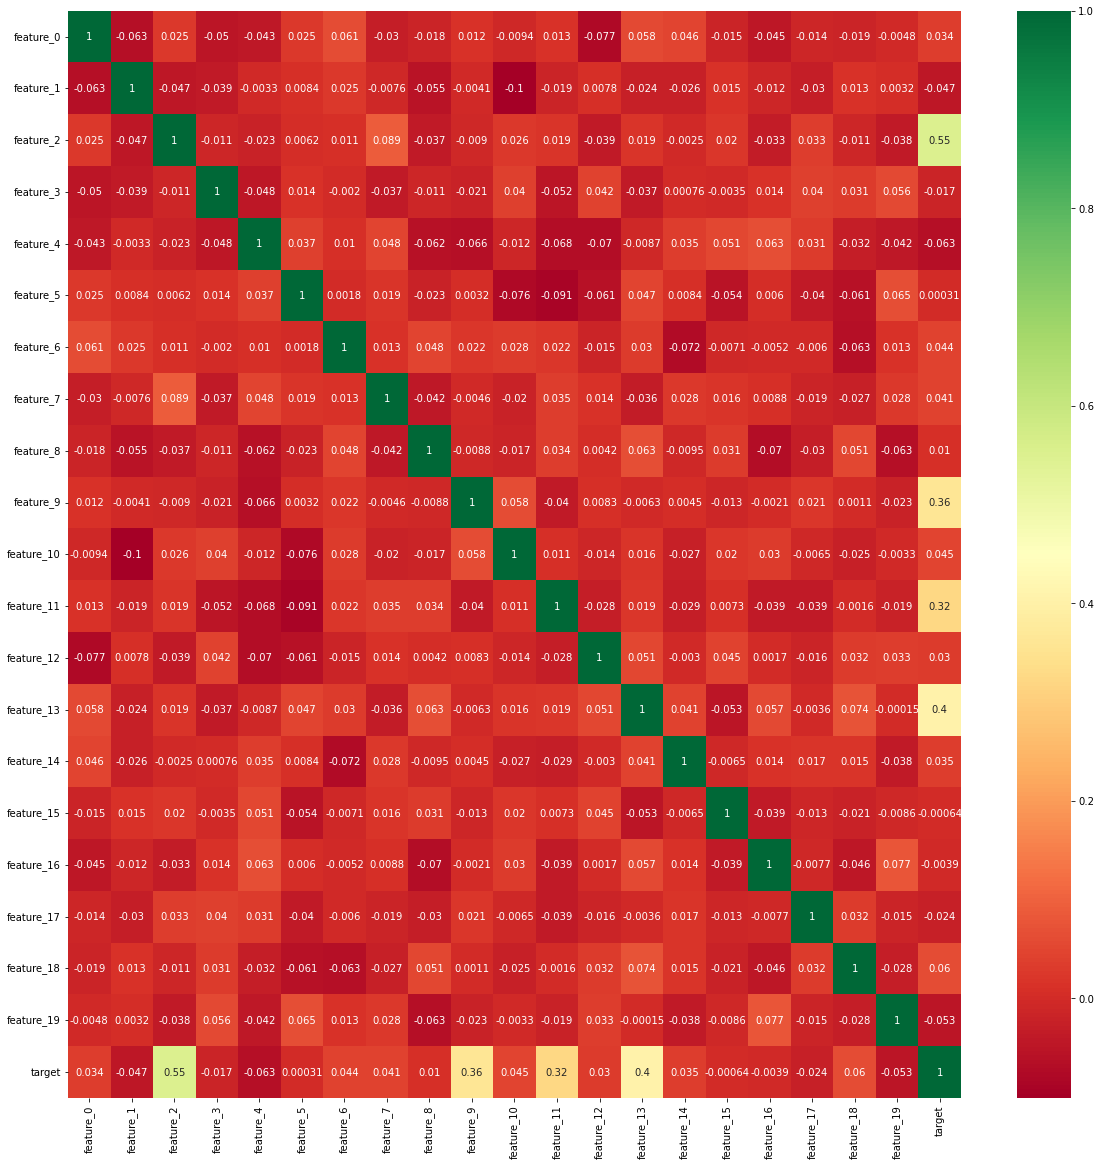

In [4]:
import seaborn as sns
corrmat = training.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(training[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Sort the top rank correlation features

In [5]:
df = pd.DataFrame(corrmat)
representative = df['target']
representative = abs(representative)
representative = representative[:-1]
representative = representative.sort_values(ascending=False)
name_repre = list()
for column_name, data in representative.items():
    name_repre.append(column_name)
name_repre

['feature_2',
 'feature_13',
 'feature_9',
 'feature_11',
 'feature_4',
 'feature_18',
 'feature_19',
 'feature_1',
 'feature_10',
 'feature_6',
 'feature_7',
 'feature_14',
 'feature_0',
 'feature_12',
 'feature_17',
 'feature_3',
 'feature_8',
 'feature_16',
 'feature_15',
 'feature_5']

## Assign the number of feature 0 to N
### > Independent variables (x)
### > Dependent variable (y)
#### The first 8 or 9 features are the highest significant

In [7]:
feature_start = 0
feature_end = 7
x = pd.read_csv('training_data.csv',usecols=name_repre[feature_start:feature_end])
x = x.to_numpy()
y = training['target'].values

### Training the model

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Differents regression model implemented

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
def get_model():
    models = dict()
    models['LR'] = LinearRegression()
    models['GBR'] = GradientBoostingRegressor(random_state=0)
    models['Ridge'] = Ridge()
    models['Lasso'] = linear_model.Lasso()
    models['ENet'] = ElasticNet()
    models['RFR'] = RandomForestRegressor(random_state=0)
    models['SVR'] = SVR(kernel='rbf')
    return models

In [10]:
from sklearn.model_selection import cross_val_score
def evaluate_model(model,x_train,y_train):
    scores = cross_val_score(model, x_train, y_train, cv = 10)
    return scores

In [11]:
models = get_model()
results, names, results_mean = list(), list(), list()

### Scores regression model with Cross Validation

In [12]:
from numpy import std
from numpy import mean
aux = 1
for name, model in models.items():
        scores = evaluate_model(model,x_train,y_train)
        results.append(scores)
        names.append(name)
        #print(name, mean(scores),std(scores))
        results_mean.append(mean(scores))
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>LR 0.702 (0.052)
>GBR 0.829 (0.032)
>Ridge 0.702 (0.052)
>Lasso 0.692 (0.054)
>ENet 0.695 (0.053)
>RFR 0.791 (0.042)
>SVR 0.546 (0.078)


### Scores polynomial regression model with Cross Validation

In [13]:
#Polynomial = 2
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
scores = evaluate_model(pol_reg,x_train,y_train)
results_mean.append(mean(scores))
name_reg = 'Poly-2'
names.append(name_reg)
results.append(scores)
print('>%s %.3f (%.3f)' % (name_reg, mean(scores), std(scores)))

#Polynomial = 3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
scores = evaluate_model(pol_reg,x_train,y_train)
results_mean.append(mean(scores))
name_reg = 'Poly-3'
names.append(name_reg)
results.append(scores)
print('>%s %.3f (%.3f)'% (name_reg,mean(scores), std(scores)))

>Poly-2 0.702 (0.052)
>Poly-3 0.702 (0.052)


## Plot different scores

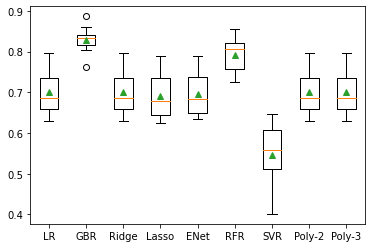

In [14]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Automatically get the most representative regression model

In [15]:
max_value = max(results_mean)
max_index = results_mean.index(max_value)
#print(max_index)  
if max_index==0:
    print('> Linear Regression')
    ml = LinearRegression()
elif max_index==1:
    print('> Gradient Boosting Regressor')
    ml = GradientBoostingRegressor(random_state=0)
elif max_index==2:
    print('> Ridge')
    ml = Ridge(alpha=1.0)
elif max_index==3:
    print('> linear_model (Lasso)')
    ml = linear_model.Lasso(alpha=0.1)
elif max_index==4:
    print('> ElasticNet')
    ml = ElasticNet(random_state=0)
elif max_index==5:
    print('> Random Forest Regressor')
    ml = RandomForestRegressor(random_state=0)
elif max_index==6:
    print('> Support Vector Regression - rbf')
    ml = SVR(kernel='rbf')
elif max_index==7:
    print('> Polynomial Degree 2')
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x_train)
    ml = LinearRegression()
elif max_index==8:
    print('> Polynomial Degree 3')
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x_train)
    ml = LinearRegression()
ml.fit(x_train,y_train)
y_predic = ml.predict(x_test)
r2_score(y_test,y_predic)

> Gradient Boosting Regressor


0.834293746732351

## Get the test dataset for regression prediction

In [16]:
data_test = pd.read_csv('blind_test_Data.csv',usecols=name_repre[feature_start:feature_end])
data_test1 = data_test.to_numpy()
data_predicted = ml.predict(data_test1)

## Create and save a new csv with target predicted

In [17]:
data_output = {'target_pred':data_predicted}
df = pd.DataFrame(data_output,columns=['target_pred'])
df.to_csv(r'target.csv',index=False,header=True)
print(df)

     target_pred
0      13.274178
1      13.290390
2      17.049511
3      12.761042
4      16.466001
..           ...
195    10.764368
196    10.479947
197    11.278032
198    15.029038
199    15.424427

[200 rows x 1 columns]
